<a href="https://colab.research.google.com/github/Volodymyr-SV/udemy-ML/blob/main/Day_17_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [146]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [147]:
reduction_method = ['PCA', 'LDA', 'Kernal PCA']
all_X_trains = []
all_X_tests = []
all_classifieres = []
N = 3

## Applying PCA

In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
all_X_trains.append(pca.fit_transform(X_train))
all_X_tests.append(pca.transform(X_test))
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

## Applying LDA

In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
all_X_trains.append(lda.fit_transform(X_train, y_train))
all_X_tests.append(lda.transform(X_test))
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

## Applying Kernel PCA

In [150]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
all_X_trains.append(kpca.fit_transform(X_train))
all_X_tests.append(kpca.transform(X_test))
# X_train = kpca.fit_transform(X_train)
# X_test = kpca.transform(X_test)

In [151]:
from sklearn.linear_model import LogisticRegression
for i in range(N):
    classifier_LR = LogisticRegression()
    classifier_LR.fit(all_X_trains[i], y_train)
    all_classifieres.append(classifier_LR)

In [152]:
from sklearn.metrics import confusion_matrix
for i in range(N):
    y_pred =all_classifieres[i].predict(all_X_tests[i])
    cm =confusion_matrix(y_test, y_pred)  
    print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


In [153]:
from matplotlib.colors import ListedColormap
def graf_plot(X_test, y_test, classifier, method_name): 
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('Logistic Regression ({name})'.format(name=method_name))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


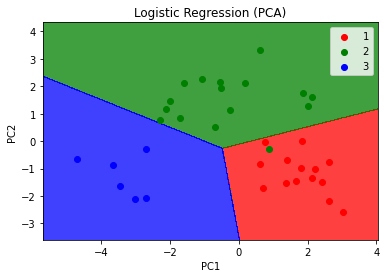

None


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


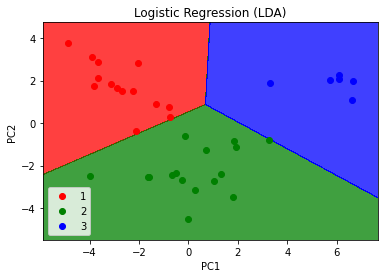

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


None


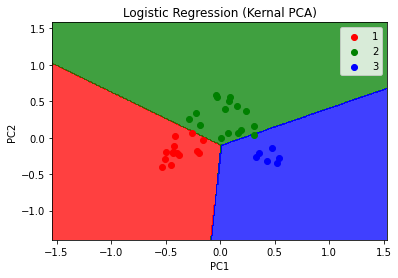

None


In [154]:
for i in range(N):
    print(graf_plot(all_X_tests[i], y_test, all_classifieres[i], reduction_method[i]))